# Bisection

to be written

In [ ]:
using Roots  #required by find_zero
using Printf #required by @sprintf
using Plots

## Root-finding procedures

Suppose that we want to find the root of the following function:

$$ Fun_1(x) = x - x\cdot\sqrt{x+1} + 5 $$

In [3]:
Fun1(x)=x-x*√(x+1)+5

Fun1 (generic function with 1 method)

In [4]:
grid_points = 0:.1:10
fun_val=Array{Float64,1}(undef, length(grid_points))

for (count, arg)∈enumerate(grid_points)
    fun_val[count] = Fun1(arg)
end

map(Fun1,grid_points)

101-element Vector{Float64}:
   5.0
   4.995119115182985
   4.980910976997934
   4.957947372470259
   4.92671361735203
   4.887627564304205
   4.841053361559589
   4.7873116632716295
   4.726687370800101
   4.6594356123118805
   4.585786437626905
   4.505948557919162
   4.420112363097041
   ⋮
 -14.10319624614305
 -14.460498941515414
 -14.820252419368678
 -15.18244373771521
 -15.547060156739057
 -15.914089133602552
 -16.283518317437338
 -16.65533554451143
 -17.02952883356448
 -17.40608638130377
 -17.784996558053976
 -18.166247903553995

This function looks as follows:

In [ ]:
plot(grid_points, fun_val, label="function")
hline!([0], label="zero")

## Bisection

In [2]:
xₗ  = 0
xᵣ = 10
mid_point  = (xᵣ + xₗ)/2
Fun1(  xₗ  )*Fun1( xᵣ ) #it's negative

for i ∈ 1:100
    
    mid_point  = (xᵣ + xₗ)/2
    if Fun1( mid_point ) * Fun1(  xₗ  ) < 0
         xᵣ = mid_point
    else
         xₗ = mid_point
    end
    println("i=$i, mid_point = $(round(mid_point, digits=3)), Fun1($(round(mid_point, digits=3))) = $(round(Fun1(mid_point), digits=3))")

    if abs(Fun1(mid_point)) < .001 #Tolerance error
        println(" 😃   abs(Fun1(mid_point))=$(abs(Fun1(mid_point))), which less than .001!!!")
        break
    end
    
end #i ∈ 1:100

LoadError: UndefVarError: Fun1 not defined

In [ ]:
plot(grid_points, fun_val, label="function")
hline!([0], label="zero")
vline!([mid_point], label="solution")

## Ilustration of the algorithm

In [128]:
grid_points = 0:.1:20
fun_val=Array{Float64,1}(undef, length(grid_points))

for (count, arg)∈enumerate(grid_points)
    fun_val[count] = Fun1(arg)
end


plot(grid_points, fun_val, label="function")
hline!([0], label="zero")

xₗ  = Array{Float64, 1}(undef, 100)
xᵣ = Array{Float64, 1}(undef, 100)
mid_point = Array{Float64, 1}(undef, 100)

xₗ[1]   = 0 
xᵣ[1]  = 20
mid_point[1] = (xₗ[1] +xᵣ[1] )/2


for i ∈ 1:99

    if Fun1(mid_point[i]) * Fun1(  xₗ[i]  ) < 0
         xᵣ[i+1] = mid_point[i]
         xₗ[i+1] = xₗ[i]
    else
         xₗ[i+1] = mid_point[i]
         xᵣ[i+1] = xᵣ[i]
    end
    
    mid_point[i+1] = (xₗ[i+1] + xᵣ[i+1] )/2

    
    println("i=$i, mid_point = $(round(mid_point[i+1], digits=3)), Fun1($(round(mid_point[i+1], digits=3))) = $(round(Fun1(mid_point[i+1]), digits=3))")
    
    if abs(Fun1(mid_point[i+1])) < .001 #Tolerance error        
        println(" 😃   abs(Fun1(mid_point))=$(abs(Fun1(mid_point[i+1]))), which less than .001!!!")
        
        break
    end
    
end #i ∈ 1:100


i=1, mid_point = 5.0, Fun1(5.0) = -2.247
i=2, mid_point = 2.5, Fun1(2.5) = 2.823
i=3, mid_point = 3.75, Fun1(3.75) = 0.577
i=4, mid_point = 4.375, Fun1(4.375) = -0.768
i=5, mid_point = 4.062, Fun1(4.062) = -0.078
i=6, mid_point = 3.906, Fun1(3.906) = 0.254
i=7, mid_point = 3.984, Fun1(3.984) = 0.089
i=8, mid_point = 4.023, Fun1(4.023) = 0.006
i=9, mid_point = 4.043, Fun1(4.043) = -0.036
i=10, mid_point = 4.033, Fun1(4.033) = -0.015
i=11, mid_point = 4.028, Fun1(4.028) = -0.005
i=12, mid_point = 4.026, Fun1(4.026) = 0.0
 😃   abs(Fun1(mid_point))=0.0004735185227016103, which less than .001!!!


┌ Info: Saved animation to 
│   fn = /Users/pytka/Dropbox/Docs/Mannheim/adv_macro/Fall 2021/anim.gif
└ @ Plots /Users/pytka/.julia/packages/Plots/SVksJ/src/animation.jl:104


Plots.AnimatedGif("/Users/pytka/Dropbox/Docs/Mannheim/adv_macro/Fall 2021/anim.gif")
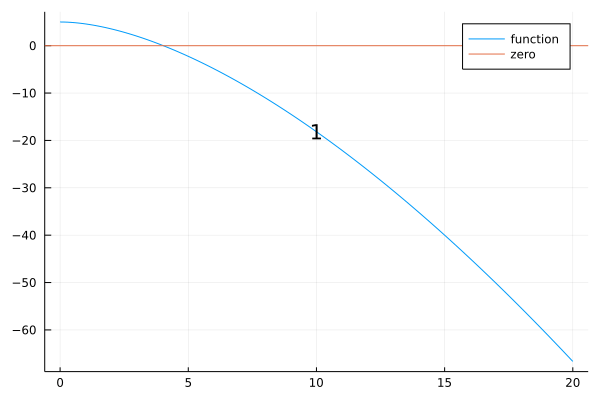

In [129]:
anim = @animate for j∈1:10
    plot(grid_points, fun_val, label="function", xlim=[2.5 7.5])
    for i∈1:j
        annotate!([( mid_point[i], Fun1(mid_point[i]), "$i")])
    end
    hline!([0], label="zero")
end

gif(anim, "anim.gif", fps = 5)

#BUILT-IN FUNCTIONS
#Root finding procedure.
#One of examples of such a procedure you should know: BISECTION.


In [130]:
solution = fzero(Fun1, 1)

4.026100199345813

In [131]:

Fun1(solution)

8.881784197001252e-16

# Iterative root finding procedure

$$
\begin{cases} 
Fun_1(x,y) = x - \sqrt{x+y} - 3\\ 
Fun_2(x,y) = y - \sqrt{x+\frac{1}{y}} - 5
\end{cases}
$$

In [132]:
Fun1(x,y)=x-√(x+y)-3
Fun2(x,y)=y-√(x+1/y)-5

Fun2 (generic function with 1 method)

In [133]:
y0 = .7
x0 = fzero( x -> Fun1(x,y0), 1)
Fun1(x0,y0)


0.0

In [134]:
#But
Fun2(x0,y0)


-6.929834998627596

In [135]:
y0 = fzero( y -> Fun2(x0,y), 1)

Fun2(x0,y0)
# Fun1(x0,y0)


0.0

In [136]:
Fun1(x0,y0)

-1.098452432583965

In [137]:
y0 = .7
for i∈1:9
    global x0 = fzero( x -> Fun1(x,y0), 1)
    println("Iteration no. $i. x₀=$x0, y₀=$y0,")
    println("Iteration no. $i. Fun1(x0,y0)=$(Fun1(x0,y0)), Fun2(x0,y0)=$(Fun2(x0,y0))")
    println("---")
    global y0 = fzero( y -> Fun2(x0,y), 1)
    println("Iteration no. $i. x₀=$x0, y₀=$y0,")
    println("Iteration no. $i. Fun1(x0,y0)=$(Fun1(x0,y0)), Fun2(x0,y0)=$(Fun2(x0,y0))")
    println("================================================================")
end

Fun1(x0,y0)
Fun2(x0,y0)


Iteration no. 1. x₀=5.487460691435179, y₀=0.7,
Iteration no. 1. Fun1(x0,y0)=0.0, Fun2(x0,y0)=-6.929834998627596
---
Iteration no. 1. x₀=5.487460691435179, y₀=7.371312241577558,
Iteration no. 1. Fun1(x0,y0)=-1.098452432583965, Fun2(x0,y0)=0.0
Iteration no. 2. x₀=6.759035477189157, y₀=7.371312241577558,
Iteration no. 2. Fun1(x0,y0)=4.440892098500626e-16, Fun2(x0,y0)=-0.2544631739539298
---
Iteration no. 2. x₀=6.759035477189157, y₀=7.624916086558346,
Iteration no. 2. Fun1(x0,y0)=-0.033582558383038474, Fun2(x0,y0)=0.0
Iteration no. 3. x₀=6.797713766620498, y₀=7.624916086558346,
Iteration no. 3. Fun1(x0,y0)=4.440892098500626e-16, Fun2(x0,y0)=-0.007357218192534987
---
Iteration no. 3. x₀=6.797713766620498, y₀=7.6322493687398625,
Iteration no. 3. Fun1(x0,y0)=-0.0009653637299931184, Fun2(x0,y0)=0.0
Iteration no. 4. x₀=6.798825452905907, y₀=7.6322493687398625,
Iteration no. 4. Fun1(x0,y0)=4.440892098500626e-16, Fun2(x0,y0)=-0.00021115812788430333
---
Iteration no. 4. x₀=6.798825452905907, y₀=7.

0.0

## Example of iterative procedure

In [138]:
# Parameters

α = .189 #price elasticity from Aguiar-Hurst (AER, 2007) https://www.aeaweb.org/articles?id=10.1257/aer.97.5.1533
δ = .33
L = 40
R = 10
y = 1
β = .8867 #.997^L


0.8867

$$p_R = \left( \frac{1}{1+\frac{c_R}{\alpha}} \right)^{-\alpha}\\
  p_W = \left( \frac{1-\delta}{1+\frac{c_W}{\alpha}} \right)^{-\alpha}\\
  c_R = \sqrt{ \beta \frac{p_W}{p_R}  } c_W\\
  p_R c_R \cdot\rho_R + p_W c_W \cdot\rho_W =  y\cdot \rho_W$$

In [139]:
pR(cR)     = (1/(1+cR/α))^(-α)
pW(cW)     = ((1-δ)/(1+cW/α))^(-α)
cR(cW, cR) = √(β*pW(cW)/pR(cR)) * cW

cR (generic function with 1 method)

In [140]:
cᴿ_value = .9 #Initial guess for retired consumption

#Implied value of working consumption given cᴿ_value:
cᵂ_value = fzero( cW -> pR(cR(cW,cᴿ_value))*cR(cW, cᴿ_value)*R + pW(cW)*cW*L-L*y, 1)

pR(cR(cᵂ_value,cᴿ_value))*cR(cᵂ_value, cᴿ_value)*R + pW(cᵂ_value)*cᵂ_value*L-L*y


0.0

In [141]:
#but cR(cᵂ_value , cᴿ_value) ≠ cᴿ_value --- contradiction
cR(cᵂ_value , cᴿ_value)


0.5523917350799546

In [142]:
println("------------------------------------------")
println("👻 Iterative procedure STARTS:")
@time for i ∈ 1:7
    global cᵂ_value = fzero( cW -> pR(cR(cW,cᴿ_value))*cR(cW, cᴿ_value)*R + pW(cW)*cW*L-L*y, 1)
    global cᴿ_value = cR(cᵂ_value, cᴿ_value)
    println("Iteration No. $i, cᴿ=$(@sprintf("%.5f", cᵂ_value)), cᵂ=$(@sprintf("%.5f", cᴿ_value))")
end
println("------------------------------------------")


------------------------------------------
👻 Iterative procedure STARTS:
Iteration No. 1, cᴿ=0.58347, cᵂ=0.55239
Iteration No. 2, cᴿ=0.57968, cᵂ=0.56885
Iteration No. 3, cᴿ=0.57990, cᵂ=0.56790
Iteration No. 4, cᴿ=0.57989, cᵂ=0.56795
Iteration No. 5, cᴿ=0.57989, cᵂ=0.56795
Iteration No. 6, cᴿ=0.57989, cᵂ=0.56795
Iteration No. 7, cᴿ=0.57989, cᵂ=0.56795
  0.010281 seconds (13.61 k allocations: 343.814 KiB, 80.20% compilation time)
------------------------------------------


In [143]:
pR(cR(cᵂ_value,cᴿ_value))*cR(cᵂ_value, cᴿ_value)*R + pW(cᵂ_value)*cᵂ_value*L-L*y

1.0590227361717552e-8

In [144]:
cR(cᵂ_value , cᴿ_value)

0.567948706299423

In [145]:
println("Summary statistics:")
println("===================================================")
println("Retirement to working prices      💵   : $(@sprintf("%.4f",(pR(cR(cᵂ_value, cᴿ_value ))/pW(cᵂ_value)))).")
println("Retirement to working cons.       🍎   : $(@sprintf("%.4f",(cR(cᵂ_value,cᴿ_value)/cᵂ_value))).")
println("Retirement to working cons. exp.  💵🍎  : $(@sprintf("%.4f",(pR(cR(cᵂ_value,cᴿ_value))*cR(cᵂ_value,cᴿ_value)/(pW(cᵂ_value)*cᵂ_value)))).")
println("===================================================")


Summary statistics:
Retirement to working prices      💵   : 0.9244.
Retirement to working cons.       🍎   : 0.9794.
Retirement to working cons. exp.  💵🍎  : 0.9053.
